In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

We will import the required library

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Here we will read the csv file to get the dataset

In [4]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Here we will verify the null values present in the dataset. There are many null values in this dataset whixh we have to remove.

In [5]:
df['CY-105'].fillna(df['CY-105'].mode()[0], inplace=True)
df['HS-105/12'].fillna(df['HS-105/12'].mode()[0], inplace=True)
df['MT-111'].fillna(df['MT-111'].mode()[0], inplace=True)
df['CS-106'].fillna(df['CS-106'].mode()[0], inplace=True)
df['EL-102'].fillna(df['EL-102'].mode()[0], inplace=True)
df['EE-119'].fillna(df['EE-119'].mode()[0], inplace=True)
df['ME-107'].fillna(df['ME-107'].mode()[0], inplace=True)
df['CS-107'].fillna(df['CS-107'].mode()[0], inplace=True)
df['HS-205/20'].fillna(df['HS-205/20'].mode()[0], inplace=True)
df['MT-222'].fillna(df['MT-222'].mode()[0], inplace=True)
df['EE-222'].fillna(df['EE-222'].mode()[0], inplace=True)
df['MT-224'].fillna(df['MT-224'].mode()[0], inplace=True)
df['CS-210'].fillna(df['CS-210'].mode()[0], inplace=True)
df['CS-211'].fillna(df['CS-211'].mode()[0], inplace=True)
df['CS-203'].fillna(df['CS-203'].mode()[0], inplace=True)
df['CS-214'].fillna(df['CS-214'].mode()[0], inplace=True)
df['EE-217'].fillna(df['EE-217'].mode()[0], inplace=True)
df['CS-212'].fillna(df['CS-212'].mode()[0], inplace=True)
df['CS-215'].fillna(df['CS-215'].mode()[0], inplace=True)
df['MT-331'].fillna(df['MT-331'].mode()[0], inplace=True)
df['EF-303'].fillna(df['EF-303'].mode()[0], inplace=True)
df['HS-304'].fillna(df['HS-304'].mode()[0], inplace=True)
df['CS-301'].fillna(df['CS-301'].mode()[0], inplace=True)
df['CS-302'].fillna(df['CS-302'].mode()[0], inplace=True)
df['TC-383'].fillna(df['TC-383'].mode()[0], inplace=True)
df['MT-442'].fillna(df['MT-442'].mode()[0], inplace=True)
df['EL-332'].fillna(df['EL-332'].mode()[0], inplace=True)
df['CS-318'].fillna(df['CS-318'].mode()[0], inplace=True)
df['CS-306'].fillna(df['CS-306'].mode()[0], inplace=True)
df['CS-312'].fillna(df['CS-312'].mode()[0], inplace=True)
df['CS-317'].fillna(df['CS-317'].mode()[0], inplace=True)
df['CS-403'].fillna(df['CS-403'].mode()[0], inplace=True)
df['CS-421'].fillna(df['CS-421'].mode()[0], inplace=True)
df['CS-406'].fillna(df['CS-406'].mode()[0], inplace=True)
df['CS-414'].fillna(df['CS-414'].mode()[0], inplace=True)
df['CS-419'].fillna(df['CS-419'].mode()[0], inplace=True)
df['CS-423'].fillna(df['CS-423'].mode()[0], inplace=True)
df['CS-412'].fillna(df['CS-412'].mode()[0], inplace=True)

Here we will remove all the null values present in the dataset. so that we can proceed with the dataset to get the result

In [6]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Here we have removed the null values from the dataset now we are good to proceed ahead.

In [7]:
df.shape

(571, 43)

There are 571 rows and 43 columns

In [9]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


Here we have described the dataset

In [10]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [11]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [12]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


Numerical Columns:  ['CGPA']


We need to check the categorical data available in dataset and also need to convert the categorical data into numerical data

<AxesSubplot:>

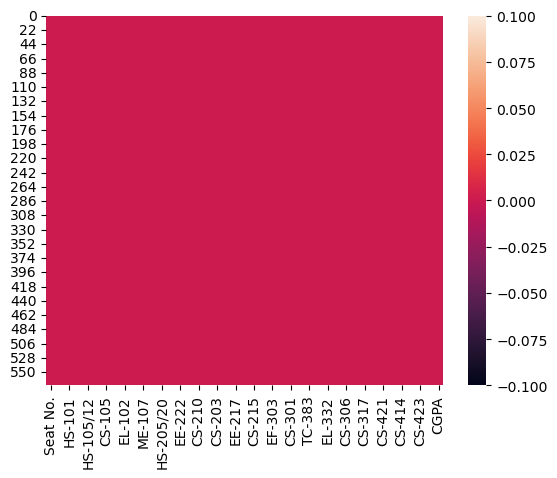

In [13]:
sns.heatmap(df.isnull())

Here heat map represents the null values in the set

In [14]:
df.skew()

CGPA   -0.497203
dtype: float64

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
data=pd.get_dummies(df).astype(int)
data.head()

,CGPA,Seat No._CS-97001,Seat No._CS-97002,Seat No._CS-97003,Seat No._CS-97004,Seat No._CS-97005,Seat No._CS-97006,Seat No._CS-97007,Seat No._CS-97008,Seat No._CS-97009,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Need to create dummy to convert the dataset

In [19]:
data.skew()

CGPA                 -0.822043
Seat No._CS-97001    23.895606
Seat No._CS-97002    23.895606
Seat No._CS-97003    23.895606
Seat No._CS-97004    23.895606
                       ...    
CS-412_C-             8.888119
CS-412_D             10.573356
CS-412_D+             8.291575
CS-412_F              9.626207
CS-412_W             13.723247
Length: 1098, dtype: float64

Checked skewness of dataset


In [23]:
df['CGPA'] = np.cbrt(df['CGPA'])

In [26]:
df.skew()

CGPA   -1.225833
dtype: float64

In [27]:
df.drop(['Seat No.'], axis=1, inplace=True)

In [28]:
df.describe()

,CGPA
count,571.000000
mean,1.013151
std,0.002957
min,0.997249
25%,1.011565
50%,1.013776
75%,1.015410
max,1.017215


In [29]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,1.009810
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,1.008644
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,1.015968
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.007995
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,1.015399


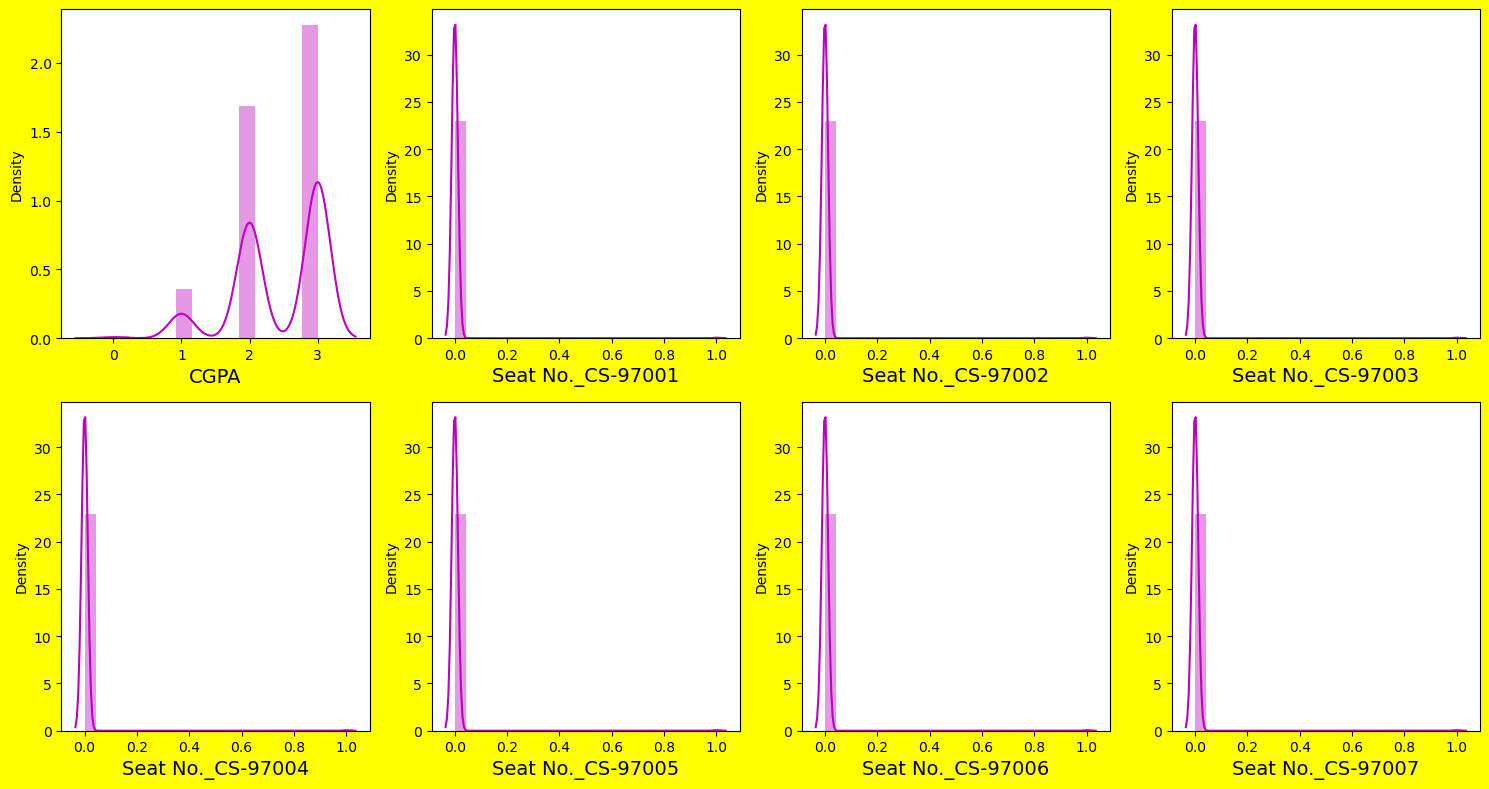

In [36]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created distplot to check the skewness of the dataset

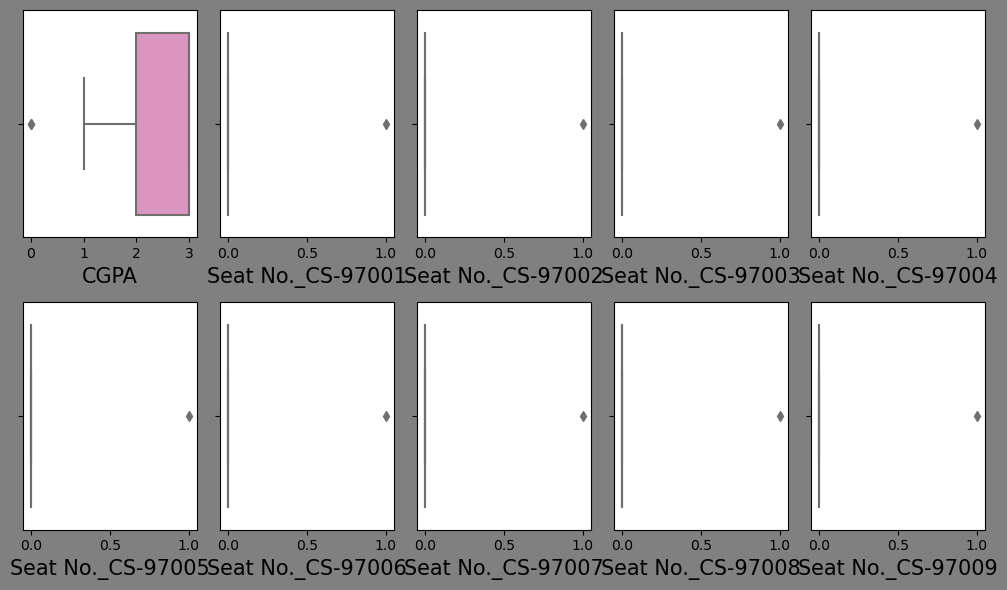

In [37]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in data:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(data[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Created box plot to check the skewness

In [38]:
cor= df.corr()
cor

,CGPA
CGPA,1.0


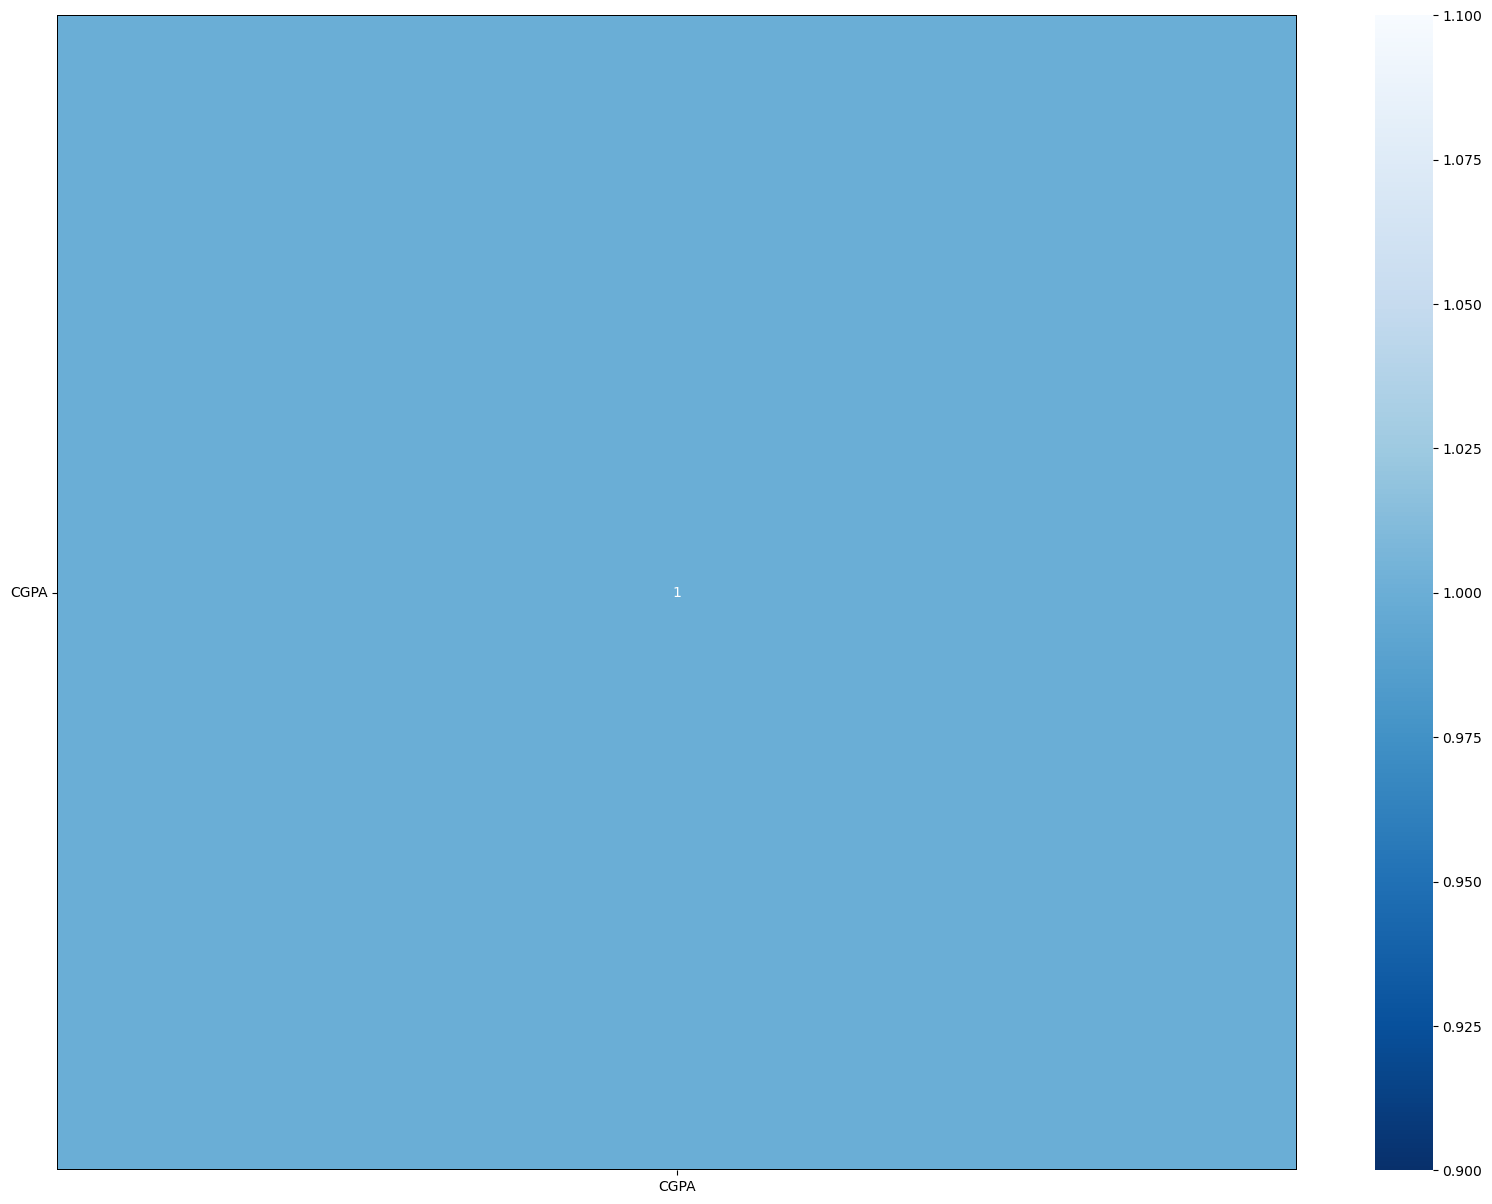

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

In [43]:
x=data.drop("CGPA", axis=1)
y=data["CGPA"]

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Seat No._CS-97001,Seat No._CS-97002,Seat No._CS-97003,Seat No._CS-97004,Seat No._CS-97005,Seat No._CS-97006,Seat No._CS-97007,Seat No._CS-97008,Seat No._CS-97009,Seat No._CS-97010,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,23.874673,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
1,-0.041885,23.874673,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,2.790092,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
2,-0.041885,-0.041885,23.874673,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
3,-0.041885,-0.041885,-0.041885,23.874673,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,4.774062,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
4,-0.041885,-0.041885,-0.041885,-0.041885,23.874673,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
567,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
568,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,-0.185527,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675
569,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,-0.041885,...,-0.358411,-0.403649,-0.263227,5.390049,-0.209465,-0.111406,-0.093989,-0.119204,-0.103051,-0.072675


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,inf,Seat No._CS-97001
1,inf,Seat No._CS-97002
2,inf,Seat No._CS-97003
3,inf,Seat No._CS-97004
4,inf,Seat No._CS-97005
...,...,...
1092,inf,CS-412_C-
1093,inf,CS-412_D
1094,inf,CS-412_D+
1095,inf,CS-412_F


In [47]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [48]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.9130434782608695
[[ 0  6  0]
 [ 0 40  4]
 [ 0  0 65]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.87      0.91      0.89        44
           3       0.94      1.00      0.97        65

    accuracy                           0.91       115
   macro avg       0.60      0.64      0.62       115
weighted avg       0.87      0.91      0.89       115



Creating models for the dataset to check the accuracy in the dataset through various models

In [49]:
GB=GradientBoostingClassifier() 
GB.fit(X_train, y_train)
predGB=GB.predict(X_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9217391304347826
[[ 1  5  0]
 [ 0 40  4]
 [ 0  0 65]]
              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.89      0.91      0.90        44
           3       0.94      1.00      0.97        65

    accuracy                           0.92       115
   macro avg       0.94      0.69      0.72       115
weighted avg       0.92      0.92      0.91       115



In [50]:
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train) 
predET=ET.predict(X_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9217391304347826
[[ 2  4  0]
 [ 0 40  4]
 [ 0  1 64]]
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           2       0.89      0.91      0.90        44
           3       0.94      0.98      0.96        65

    accuracy                           0.92       115
   macro avg       0.94      0.74      0.79       115
weighted avg       0.92      0.92      0.91       115



In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'random_state':[10, 50, 1000], 
              'max_depth':[0, 10, 20],
            'n_jobs':[-2, -1, 1],
              'n_estimators':[50, 100, 200, 300]}

In [54]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [55]:
import joblib
joblib.dump(ET,"CGPA.pkl")

['CGPA.pkl']

In [56]:
model = joblib.load("CGPA.pkl")
prediction = model.predict(X_test)
prediction

array([2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3,
       2, 1, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 2])

In [57]:
a = np.array(y_test) 
data = pd.DataFrame()
data["Predicted"] = prediction
data["Original"]=a
data

,Predicted,Original
0,2,1
1,3,3
2,2,2
3,2,2
4,3,3
...,...,...
110,2,2
111,3,3
112,3,3
113,3,3


Here predicted the CGPA of the students in the dataset which is almst predicted correcting as original